In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "Arial"
})

plot_save = "plots/bdata/"

In [2]:
data = []
for file in glob.glob("bdata/computation*.csv"):
  print(file)
  data.append(pd.read_csv(file, delimiter=',', ))
data = pd.concat(data)
data = data.reset_index(drop=True)

display(data.head(5))

bdata/computation9.csv
bdata/computation5.csv
bdata/computation4.csv
bdata/computation2.csv
bdata/computation0.csv
bdata/computation1.csv
bdata/computation7.csv
bdata/computation8.csv
bdata/computation6.csv
bdata/computation3.csv


,Unnamed: 0,FreeNet_pre_score,FreeNet_post_score,FreeNet_pre_rank,FreeNet_post_rank,FreeNet_delta_ranks,Reversed_pre_score,Reversed_post_score,Reversed_pre_rank,Reversed_post_rank,...,Random_post_score,Random_pre_rank,Random_post_rank,Random_delta_ranks,dist_victim_relayer,out_deg_victim,in_deg_villain,victim,villain,relayer
0,0,0,101,165.5,964.0,798.5,0,3,165.5,357.0,...,0.000306,197.0,640.0,443.0,5,3,1,786,787,500
1,1,0,102,166.0,940.5,774.5,0,3,166.0,389.0,...,0.000442,199.5,714.0,514.5,4,2,0,943,201,396
2,2,28,28,780.0,780.0,0.0,24,24,796.0,796.0,...,0.000817,791.0,791.0,0.0,-1,3,5,774,418,812
3,3,6,1646,449.5,1000.0,550.5,25,96,426.0,758.0,...,0.010484,200.5,978.0,777.5,1,12,1,106,618,128
4,4,124,330,955.5,991.0,35.5,12,12,693.0,693.0,...,0.003438,928.0,929.0,1.0,3,2,30,849,75,570


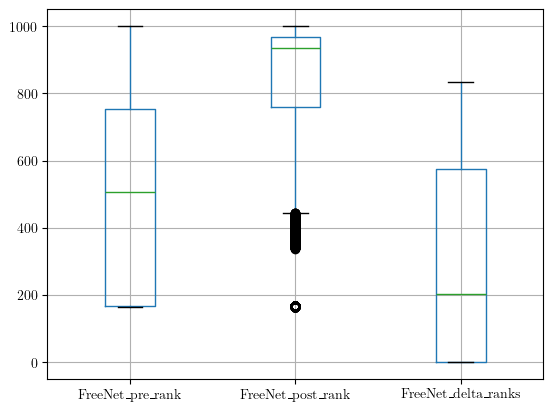

In [3]:
data.boxplot(column=['FreeNet_pre_rank', 'FreeNet_post_rank', 'FreeNet_delta_ranks'])
plt.savefig(fname=plot_save + "freenet_rank.png")
plt.show()

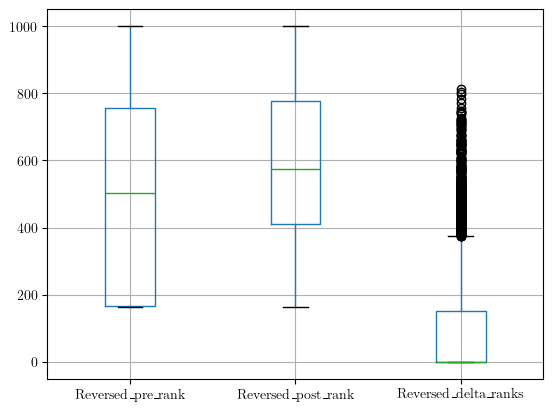

In [4]:
data.boxplot(column=['Reversed_pre_rank', 'Reversed_post_rank', 'Reversed_delta_ranks'])
plt.savefig(fname=plot_save + "reversed_rank.png")
plt.show()


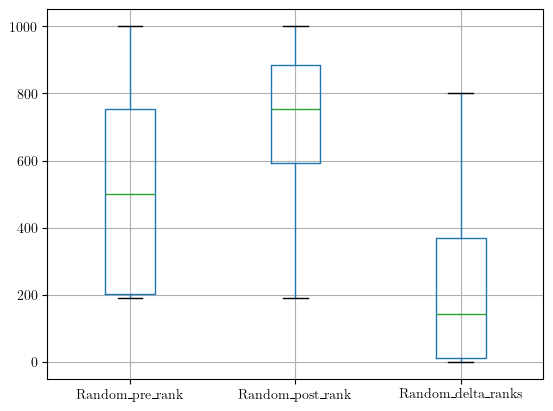

In [5]:
data[data.dist_victim_relayer>=0].boxplot(column=['Random_pre_rank', 'Random_post_rank', 'Random_delta_ranks'])
plt.savefig(fname=plot_save + "random_rank.png")
plt.show()


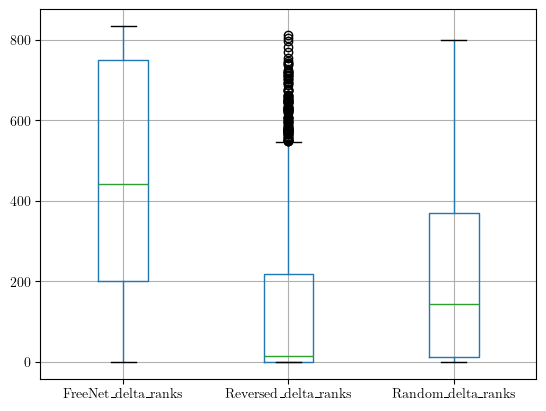

In [6]:
data[data.dist_victim_relayer>=0].boxplot(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'])
plt.savefig(fname=plot_save + "all_rank.png")
plt.show()


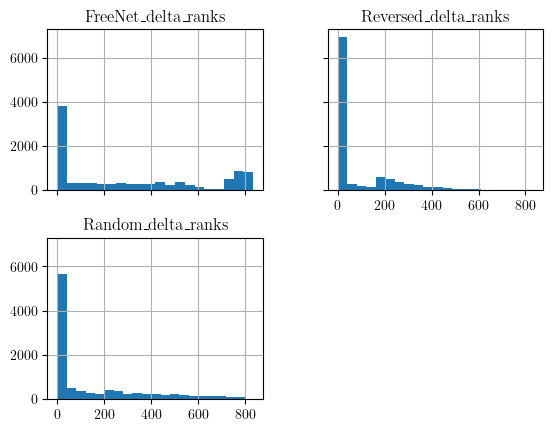

In [7]:
data.hist(column=['FreeNet_delta_ranks', 'Reversed_delta_ranks', 'Random_delta_ranks'], bins=20, sharey=True, sharex=True)
plt.savefig(fname=plot_save + "hist.png")
plt.show()
